# Численное интегрирование

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Во всех задачах требуется используя формулу прямоугольников, трапеции и Симпсона вычислить приближенное значение интеграла. Исследовать зависимость ошибки вычислений от шага сетки. </p>

$$
\begin{equation}
f(x) = \frac{1}{1 + e^x}, \ \ \ {x \in [-1, 1]}
\end{equation}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return 1 / (1 + np.exp(x))

In [3]:
# интерал исходной функции на заданном интервале

f_integral = np.log(np.power(np.exp(1), 2) / (1 + np.exp(1)) * (1 + np.exp(-1)))

# интервал
a = -1
b = 1

f_integral

1.0

In [4]:
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

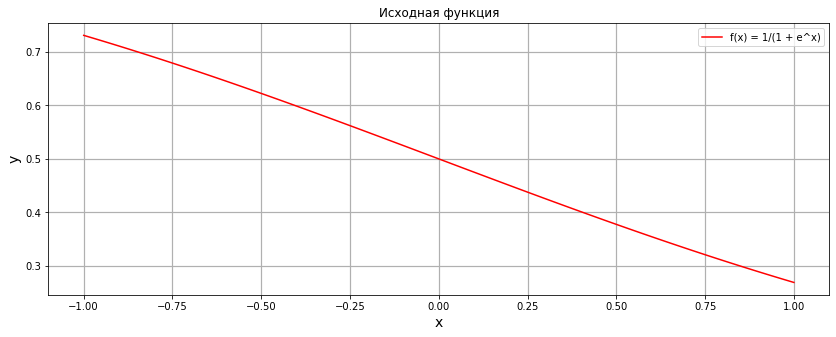

In [5]:
# график исходной функии
fig, ax  = plt.subplots(figsize=(14, 5))

ax.plot(x_plot, y_plot, color="red", label='f(x) = 1/(1 + e^x)')

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.title("Исходная функция")
plt.legend()

plt.show()


### Вычисления

#### Интеграл

In [6]:
def rectangle_method(x_plot, h):
    integral = 0
    
    for i in range(0, len(x_plot) - 1):
        x = x_plot[i]
        integral += f(x) * h
    
    return integral

def trapezoid_method(x_plot, h):
    integral = 0
    
    for i in range(0, len(x_plot) - 1):
        x = x_plot[i]
        integral += h / 2 * (f(x + h) + f(x))
    
    return integral
    
def Simpson_method(x_plot, h):
    integral = 0
    
    for i in range(0, len(x_plot) - 1):
        x = x_plot[i]
        integral += h / 6 * (f(x) + 4 * f(x + h/2) + f(x + h))
    
    return integral

In [7]:
print('Step:', x_plot[1] - x_plot[0])
print('\n I:', f_integral, '\n' , 
      'Rectangle_I:', rectangle_method(x_plot, x_plot[1] - x_plot[0]), '\n' ,
     'Trapezoid_I:', trapezoid_method(x_plot, x_plot[1] - x_plot[0]), '\n' ,
     'Simpson_I:', Simpson_method(x_plot, x_plot[1] - x_plot[0]), 
     )

Step: 0.02020202020202022

 I: 1.0 
 Rectangle_I: 1.0046678500733341 
 Trapezoid_I: 1.0000000000000009 
 Simpson_I: 1.0000000000000009


#### Ошибки

In [13]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [14]:
# вычисление ошибок

h_plot = []
rectangle_errors = []
trapezoid_errors = []
Simpson_errors = []

for n in np.arange(node_min_count, node_max_count + 1, step=10):
    
    x0_plot, h = np.linspace(a, b, n, retstep=True)

    rectangle_error = abs(f_integral - rectangle_method(x0_plot, h))
    trapezoid_error = abs(f_integral - trapezoid_method(x0_plot, h))
    Simpson_error = abs(f_integral - Simpson_method(x0_plot, h))
    
    rectangle_errors.append(rectangle_error)
    trapezoid_errors.append(trapezoid_error)
    Simpson_errors.append(Simpson_error)
    
    h_plot.append(h)

In [15]:
d = {'H': h_plot, 
     'R_rectangle_method': rectangle_errors,  
     'R_trapezoid_method': trapezoid_errors, 
     'R_Simpson_method': Simpson_errors 
    }
df = pd.DataFrame(data=d)
df

,H,R_rectangle_method,R_trapezoid_method,R_Simpson_method
0,0.222222,0.051346,2.220446e-16,0.000000e+00
1,0.105263,0.024322,1.110223e-16,2.220446e-16
2,0.068966,0.015935,0.000000e+00,1.110223e-16
3,0.051282,0.011849,4.440892e-16,0.000000e+00
4,0.040816,0.009431,2.220446e-16,2.220446e-16
...,...,...,...,...
95,0.002086,0.000482,6.661338e-16,5.551115e-16
96,0.002064,0.000477,6.661338e-16,6.661338e-16
97,0.002043,0.000472,2.220446e-16,0.000000e+00
98,0.002022,0.000467,1.221245e-15,8.881784e-16


#### Графики ошибок

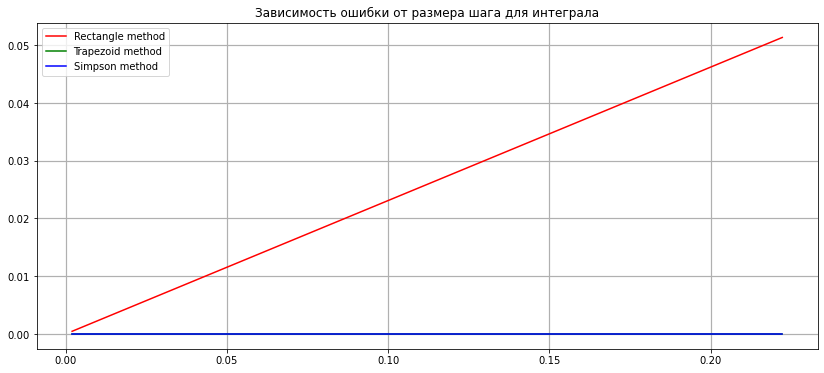

In [16]:
# график зависимости ошибки от размера шага для интеграла

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(h_plot, rectangle_errors, color="red", label='Rectangle method')
ax.plot(h_plot, trapezoid_errors, color="green", label='Trapezoid method')
ax.plot(h_plot, Simpson_errors, color="blue", label='Simpson method')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

# ax.set_xlabel("|ln(h)|", fontsize=14)        
# ax.set_ylabel("|ln(R)|", fontsize=14)

plt.title("Зависимость ошибки от размера шага для интеграла")
plt.legend()

plt.show()

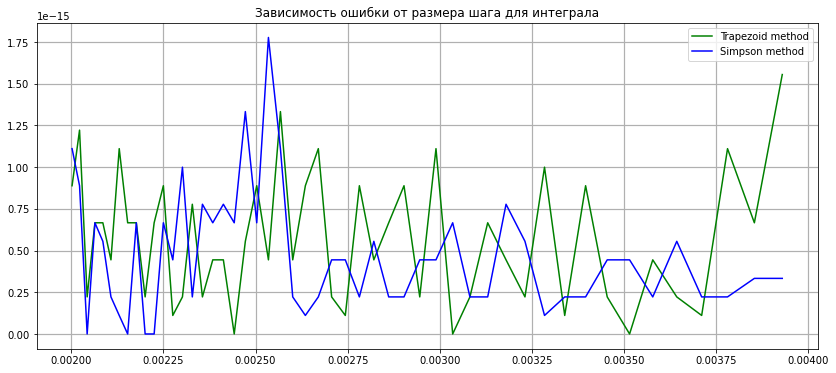

In [22]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(h_plot[50:], trapezoid_errors[50:], color="green", label='Trapezoid method')
ax.plot(h_plot[50:], Simpson_errors[50:], color="blue", label='Simpson method')


ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

# ax.set_xlabel("|ln(h)|", fontsize=14)        
# ax.set_ylabel("|ln(R)|", fontsize=14)

plt.title("Зависимость ошибки от размера шага для интеграла")
plt.legend()

plt.show()

In [23]:
len(h_plot)

100